In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'Y dataset')

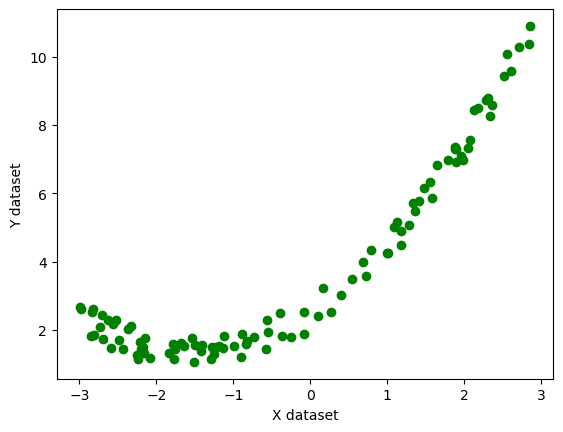

In [6]:
X=6*np.random.rand(100,1)-3
Y=0.5*X**2 + 1.5*X+2+np.random.rand(100,1)
#quadratic equation used y=0.5x^2+1.5X+2+outliers
plt.scatter(X,Y,color='g')
plt.xlabel('X dataset')
plt.ylabel('Y dataset')

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [8]:
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
Scaler.fit_transform(X_train)
Scaler.transform(X_test)

array([[ 1.2664978 ],
       [-1.27201241],
       [ 0.28005432],
       [ 0.85256677],
       [ 0.83228158],
       [ 1.79890129],
       [ 0.78344283],
       [-1.33003574],
       [ 1.49407293],
       [ 1.04485545],
       [-0.69878628],
       [-0.089646  ],
       [ 1.37736038],
       [ 1.08647384],
       [ 0.62578007],
       [-1.33840868],
       [ 0.66510618],
       [-1.16787279],
       [ 1.21629456],
       [-0.97003263],
       [-0.26609865],
       [-0.22662185],
       [ 0.31935481],
       [-0.74436889],
       [ 1.6200725 ]])

In [13]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression(n_jobs=-1)

In [14]:
regression.fit(X_train,Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,-1
,positive,False


In [17]:
from sklearn.metrics import r2_score
score=r2_score(Y_test,regression.predict(X_test))
print(score)

0.7660195946764473


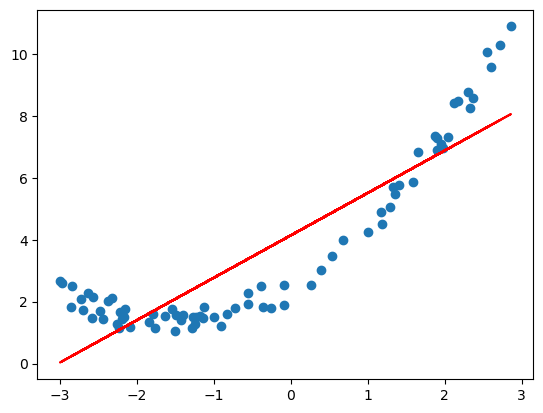

In [19]:
plt.plot(X_train,regression.predict(X_train),color="r")
plt.scatter(X_train,Y_train)

In [20]:
from sklearn.preprocessing import PolynomialFeatures

In [23]:
poly=PolynomialFeatures(degree=2,include_bias=True)
X_trin_poly=poly.fit_transform(X_train)
X_test_poly=poly.transform(X_test) 

In [25]:
X_trin_poly

array([[ 1.00000000e+00,  6.79705855e-01,  4.62000050e-01],
       [ 1.00000000e+00, -1.53913265e+00,  2.36892931e+00],
       [ 1.00000000e+00, -8.30552316e-01,  6.89817149e-01],
       [ 1.00000000e+00, -2.58462535e+00,  6.68028819e+00],
       [ 1.00000000e+00, -1.24500900e+00,  1.55004742e+00],
       [ 1.00000000e+00,  1.00275745e+00,  1.00552251e+00],
       [ 1.00000000e+00,  2.64939989e-01,  7.01931979e-02],
       [ 1.00000000e+00,  1.95708634e+00,  3.83018694e+00],
       [ 1.00000000e+00, -1.28553381e+00,  1.65259717e+00],
       [ 1.00000000e+00,  1.28862030e+00,  1.66054227e+00],
       [ 1.00000000e+00, -2.72957555e+00,  7.45058266e+00],
       [ 1.00000000e+00, -3.89222323e-01,  1.51494017e-01],
       [ 1.00000000e+00,  2.60528991e+00,  6.78753549e+00],
       [ 1.00000000e+00, -1.13769547e+00,  1.29435098e+00],
       [ 1.00000000e+00,  1.41020262e+00,  1.98867142e+00],
       [ 1.00000000e+00, -2.17032605e+00,  4.71031515e+00],
       [ 1.00000000e+00, -2.25451581e+00

In [26]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression(n_jobs=-1)
regression.fit(X_trin_poly,Y_train)
from sklearn.metrics import r2_score
score=r2_score(Y_test,regression.predict(X_test_poly))
print(score)

0.987871773757291


In [27]:
print(regression.coef_)

[[0.         1.50246152 0.49637825]]


In [29]:
print(regression.intercept_)

[2.49212476]


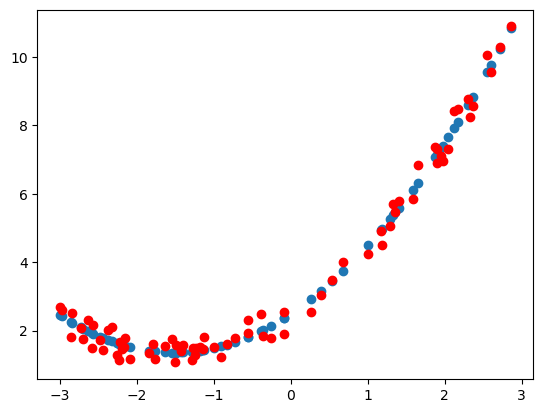

In [32]:
plt.scatter(X_train,regression.predict(X_trin_poly))
plt.scatter(X_train,Y_train,color="r")

In [34]:
poly=PolynomialFeatures(degree=3,include_bias=True)
X_trin_poly=poly.fit_transform(X_train)
X_test_poly=poly.transform(X_test) 

#PipeLine

In [35]:
from sklearn.pipeline import Pipeline

In [53]:
def poly_regression(degree):
    X_new=np.linspace(-3,3,200).reshape(200,1)
    poly_features=PolynomialFeatures(degree=degree,include_bias=True)
    lin_reg=LinearRegression()
    poly_regression=Pipeline([('poly_features',poly_features),('lin_reg',lin_reg)])
    poly_regression.fit(X_train,Y_train)
    y_pred_new=poly_regression.predict(X_new)
    plt.plot(X_new,y_pred_new,'r',label="Degree"+str(degree),linewidth=3)
    plt.scatter(X_train,Y_train,color="b")
    plt.scatter(X_test,Y_test,color="g")
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.axis([-4,4,0,10])

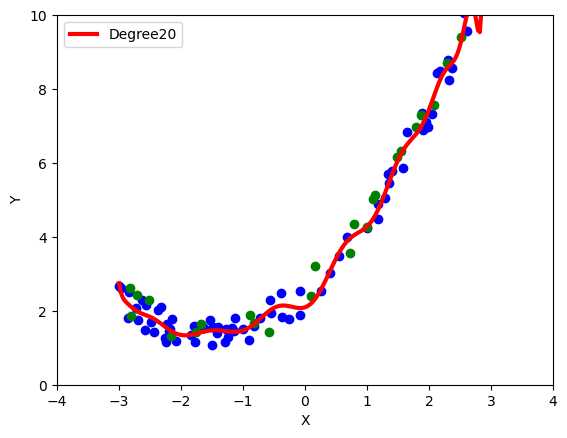

In [57]:
poly_regression(20)

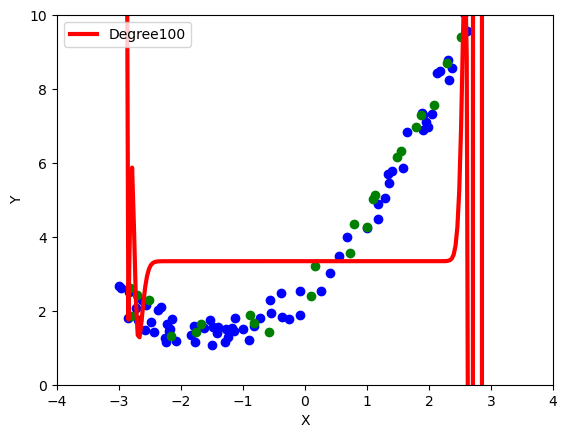

In [58]:
poly_regression(100)